In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Sorry this code is gross I put it together rly hastily :<

# Splits data into readable hex values
def ProcessData(input, dataLength):
  # RSSI  lastencoderDigit,ID   first&secondencoderdigit
  input = input.replace(" -", "")
  input = input.replace("  ", " ")
  dataInputArray = input.split(" ")
  # Iterate through list and pop any entries with length != 2
  new_list = [x for x in dataInputArray if len(x)<=2]
  
  while len(new_list) % 3 != 0:
    new_list.pop(len(new_list)-1)
    
  return np.reshape(new_list,(-1,dataLength))

# Splits hex values into a 2D array of 3 arrays, each containing the RSSI of a particular transmitter
def GetRSSIofTransmitters(input, transmitters):
  transmitters = [10,11,12]
  RSSItoPlot = [[],[],[]]
  for x in range(len(transmitters)):
    for data in input:
      try:
        if int(data[1], 16) % 16 == transmitters[x]:
          RSSItoPlot[x].append(int(data[0],16))
      except:
        continue
  return RSSItoPlot

def PlotFile(file, distance):
  with open(file, 'r') as f:
    data = f.read()
  
  RSSI = GetRSSIofTransmitters(ProcessData(data, 3),[10,11,12])

  plt.figure()
  ax = plt.subplot()
  ax.set_ylim(-100,-40)
  dBmA = todBm(RSSI[0])
  dBmB = todBm(RSSI[1])
  dBmC = todBm(RSSI[2])
  
  ax.plot(np.linspace(0,len(dBmA),len(dBmA)), dBmA,color="red", label="A", alpha=0.4) # RSSI from transmitter A
  mean_a = np.mean(dBmA)
  sd_a = np.std(dBmA)
  plot_mean_sd(mean_a,sd_a,"red",ax)
  
  ax.plot(np.linspace(0,len(dBmB),len(dBmB)), dBmB,color="green", label="B", alpha=0.2) # RSSI from transmitter B
  mean_b = np.mean(dBmB)
  sd_b = np.std(dBmB)
  plot_mean_sd(mean_b,sd_b,"green",ax)
  
  ax.plot(np.linspace(0,len(dBmC),len(dBmC)), dBmC,color="blue", label="C", alpha=0.2) # RSSI from transmitter C
  mean_c = np.mean(dBmC)
  sd_c = np.std(dBmC)
  plot_mean_sd(mean_c,sd_c,"blue",ax)
  
  print("\n\n\nMean A", mean_a)
  print("standard dev a", sd_a)
  print("\nMean B", mean_b)
  print("standard dev b", sd_b)
  print("\nMean c", mean_c)
  print("standard dev c", sd_c)
  ax.set_title(distance + " meters")
  ax.legend()
  
def plot_mean_sd(mean,sd,colour, ax : plt.Axes):
  ax.axhline(mean,0,1,linestyle='-',color=colour)
  ax.axhline(mean+sd,0,1,linestyle='-.',color=colour, alpha=0.7)
  ax.axhline(mean-sd,0,1,linestyle='-.',color=colour, alpha=0.7)
  
def todBm(RSSI):
  mean = np.mean(RSSI)
  std = np.std(RSSI)
  cutoff = 4 * 3
  lower, upper = mean - cutoff, mean + cutoff
  RSSI_removed = [-x for x in RSSI if x > lower and x < upper]
  return np.array(RSSI_removed)




Mean A -29.246268656716417
standard dev a 3.8467597668613216

Mean B -60.552
standard dev b 4.032777702775098

Mean c -58.242105263157896
standard dev c 5.461281495021753



Mean A -56.391857506361326
standard dev a 4.009420822050995

Mean B -89.35494880546075
standard dev b 2.7433352836661777

Mean c -86.70517928286853
standard dev c 3.553900986079053



Mean A -73.055
standard dev a 4.734128747721169

Mean B -95.125
standard dev b 3.295356581616017

Mean c -95.06382978723404
standard dev c 2.5632779489099575



Mean A -85.1472320376914
standard dev a 5.076168481158122

Mean B nan
standard dev b nan

Mean c nan
standard dev c nan


c:\Users\euan\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\euan\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\euan\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\euan\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\euan\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype

'\nrssiData = GetRSSIofTransmitters(ProcessData(dataInput, 3),[10,11,12]) # Returns 2D array of RSSI for each transmitter [[transmitter A], [transmitter B], [transmitter C]]\nplt.plot(np.linspace(0,len(rssiData[0]),len(rssiData[0])), rssiData[0],color="red") # RSSI from transmitter A\nplt.plot(np.linspace(0,len(rssiData[1]),len(rssiData[1])), rssiData[1],color="green") # RSSI from transmitter B\nplt.plot(np.linspace(0,len(rssiData[2]),len(rssiData[2])), rssiData[2],color="blue") # RSSI from transmitter C\n'

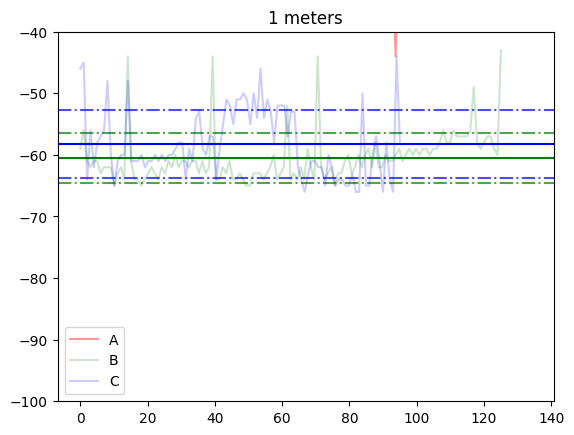

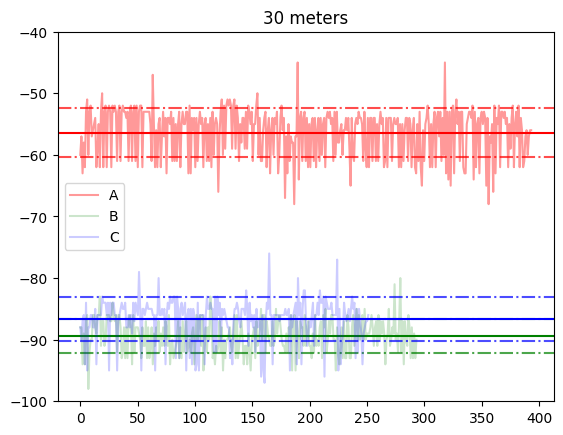

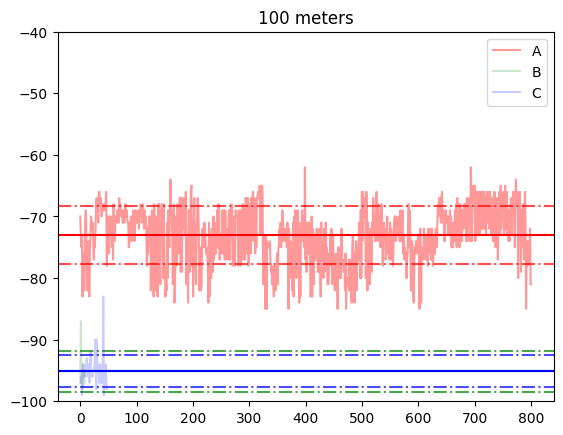

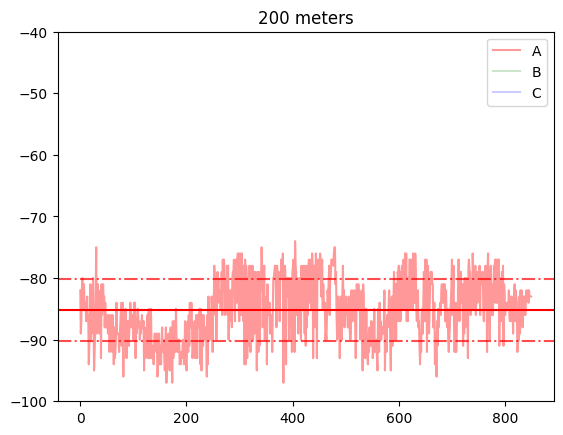

In [16]:
test_data = """
0x07FC53A4  54 5B 11 3B 6A 14 3C 3A - 15 58 2C 04 54 AB 12 45 T[.;j.<:.X,.T..E
0x07FC53B4  EA 15 3E 1A 00 41 5B 13 - 4E EB 13 59 5C 06 47 3B ..>..A[.N..Y\.G;
0x07FC53C4  14 55 BC 06 2A 3A 01 49 - CC 06 48 3B 14 33 3A 01 .U..*:.I..H;.3:.
0x07FC53D4  38 CC 06 50 3B 14 50 CC - 06 47 3B 14 53 0C 07 55 8..P;.P..G;.S..U
0x07FC53E4  4B 14 41 6A 01 59 CB 14 - 50 8C 07 58 4C 08 3D 2A K.Aj.Y..P..XL.=*
0x07FC53F4  03 56 AC 09 48 BA 04 53 - BB 00 49 3B 01 3B 4A 05 .V..H..S..I;.;J.
0x07FC5404  32 AA 05 26 AA 05 36 AA - 05 50 9B 01 3B AA 05 3F 2..&..6..P..;..?
0x07FC53F4  03 56 AC 09 48 BA 04 53 - BB 00 49 3B 01 3B 4A 05 .V..H..S..I;.;J.
0x07FC5404  32 AA 05 26 AA 05 36 AA - 05 50 9B 01 3B AA 05 3F 2..&..6..P..;..?
0x07FC53F4  03 56 AC 09 48 BA 04 53 - BB 00 49 3B 01 3B 4A 05 .V..H..S..I;.;J.
0x07FC5404  32 AA 05 26 AA 05 36 AA - 05 50 9B 01 3B AA 05 3F 2..&..6..P..;..?
0x07FC53F4  03 56 AC 09 48 BA 04 53 - BB 00 49 3B 01 3B 4A 05 .V..H..S..I;.;J.
0x07FC5404  32 AA 05 26 AA 05 36 AA - 05 50 9B 01 3B AA 05 3F 2..&..6..P..;..?
0x07FC53F4  03 56 AC 09 48 BA 04 53 - BB 00 49 3B 01 3B 4A 05 .V..H..S..I;.;J.
0x07FC5404  32 AA 05 26 AA 05 36 AA - 05 50 9B 01 3B AA 05 3F 2..&..6..P..;..?
0x07FC5414  CA 05
 """

PlotFile(r"C:\Users\euan\OneDrive\Desktop\Dissertation Project\First-Tests\Range-Tests\1m-test.txt", "1")
PlotFile(r"C:\Users\euan\OneDrive\Desktop\Dissertation Project\First-Tests\Range-Tests\30m-test.txt", "30")
PlotFile(r"C:\Users\euan\OneDrive\Desktop\Dissertation Project\First-Tests\Range-Tests\100m-test.txt", "100")
PlotFile(r"C:\Users\euan\OneDrive\Desktop\Dissertation Project\First-Tests\Range-Tests\200m-test.txt", "200")


'''
rssiData = GetRSSIofTransmitters(ProcessData(dataInput, 3),[10,11,12]) # Returns 2D array of RSSI for each transmitter [[transmitter A], [transmitter B], [transmitter C]]
plt.plot(np.linspace(0,len(rssiData[0]),len(rssiData[0])), rssiData[0],color="red") # RSSI from transmitter A
plt.plot(np.linspace(0,len(rssiData[1]),len(rssiData[1])), rssiData[1],color="green") # RSSI from transmitter B
plt.plot(np.linspace(0,len(rssiData[2]),len(rssiData[2])), rssiData[2],color="blue") # RSSI from transmitter C
'''